In [1]:
import numpy as np

In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([5, 20, 14, 32, 22, 38])

In [6]:
x

array([[ 5],
       [15],
       [25],
       [35],
       [45],
       [55]])

In [7]:
y

array([ 5, 20, 14, 32, 22, 38])

In [8]:
model = LinearRegression

In [11]:
model.fit(x, y)

AttributeError: 'numpy.ndarray' object has no attribute '_validate_params'

In [12]:
model = LinearRegression().fit(x, y)

In [13]:
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.7158756137479542


In [14]:
print(f"intercept: {model.intercept_}")

intercept: 5.633333333333329


In [15]:
print(f"slope: {model.coef_}")

slope: [0.54]


In [17]:
new_model = LinearRegression().fit(x, y.reshape((-1, 1)))
print(f"intercept: {new_model.intercept_}")
print(f"slope: {new_model.coef_}")

intercept: [5.63333333]
coefficients:
slope: [[0.54]]


In [18]:
y_pred = model.predict(x)
print(f"predicted response:\n{y_pred}")

predicted response:
[ 8.33333333 13.73333333 19.13333333 24.53333333 29.93333333 35.33333333]


In [19]:
y_pred = model.intercept_ + model.coef_ * x
print(f"predicted response:\n{y_pred}")

predicted response:
[[ 8.33333333]
 [13.73333333]
 [19.13333333]
 [24.53333333]
 [29.93333333]
 [35.33333333]]


In [22]:
x_new = np.arange(5).reshape((-1, 1))
x_new

array([[0],
       [1],
       [2],
       [3],
       [4]])

In [23]:
y_new = model.predict(x_new)
y_new

array([5.63333333, 6.17333333, 6.71333333, 7.25333333, 7.79333333])

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Supress Warnings
import warnings 
warnings.filterwarnings('ignore')

C:\Users\Dell\AppData\Local\Temp\ipykernel_7948\197470430.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [25]:
data = pd.read_csv("forestfires.csv")

In [26]:
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [28]:
pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ----- --------------------------------- 41.0/294.9 kB 960.0 kB/s eta 0:00:01
   ------------------------------------ --- 266.2/294.9 kB 2.7 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 2.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [29]:
import seaborn as sns

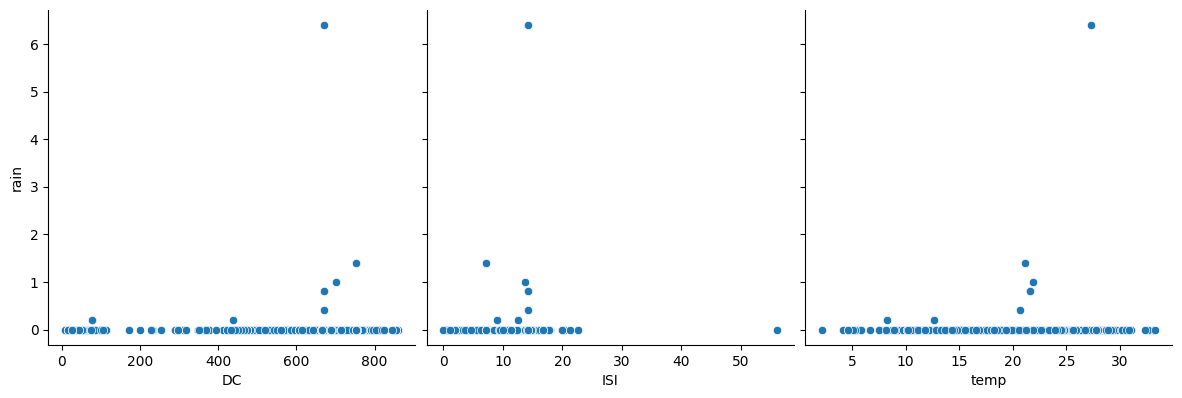

In [31]:
sns.pairplot(data, x_vars=[ 'DC', 'ISI', 'temp'], y_vars = 'rain', size = 4, kind = 'scatter' )
plt.show()

In [34]:
#linear regression
x = data['wind']
y = data['temp']

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split( x, y, train_size = 0.8, test_size = 0.2, random_state = 100 )

In [38]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(413,)
(104,)
(413,)
(104,)


In [42]:
pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB 330.3 kB/s eta 0:00:30
   ---------------------------------------- 0.1/9.8 MB 491.5 kB/s eta 0:00:20
    --------------------------------------- 0.2/9.8 MB 833.5 kB/s eta 0:00:12
   - -------------------------------------- 0.3/9.8 MB 1.1 MB/s eta 0:00:09
   - -------------------------------------- 0.5/9.8 MB 1.8 MB/s eta 0:00:06
   -- ------------------------------------- 0.7/9.8 MB 2.0 MB/s eta 0:00:05
   --- ------------------------------------ 0.8/9.8 MB 2.2 MB/s eta 0:00:05
   ---- ----------------------------------- 1.1/9.8 MB 2.5 MB/s eta 0:00:04
   ----- ---------------------------------- 1.2/9.8 MB 2.6 MB/s eta 0:00:04
   ----- ---------------------------------- 1.4/9.8 MB 2.8 MB/s eta 0:00:04
   ------ -----------------

In [43]:
import statsmodels.api as sm

In [44]:
# Add a constant to get an intercept
x_train_sm = sm.add_constant(x_train)
# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, x_train_sm).fit()

In [45]:
lr.params

const    22.456220
wind     -0.900741
dtype: float64

In [46]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                   temp   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     34.88
Date:                Wed, 28 Feb 2024   Prob (F-statistic):           7.35e-09
Time:                        11:31:22   Log-Likelihood:                -1295.7
No. Observations:                 413   AIC:                             2595.
Df Residuals:                     411   BIC:                             2604.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.4562      0.676     33.220      0.0

In [49]:
# Add a constant to x_test
x_test_sm = sm.add_constant(x_test)
# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(x_test_sm)

In [50]:
y_pred.head()

217    16.781553
260    18.853257
142    14.439626
152    20.834886
255    18.853257
dtype: float64

In [51]:
#Imporitng libraries
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [53]:
#RMSE value
print( "RMSE: ",np.sqrt( mean_squared_error( y_test, y_pred ) ))
#R-squared value
print( "R-squared: ",r2_score( y_test, y_pred ) )

RMSE:  5.970095755968522
R-squared:  -0.07285786361880664
